In [1]:
from utils import get_data
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
ground_truth, _ = get_data()
ground_truth = ground_truth[:3]

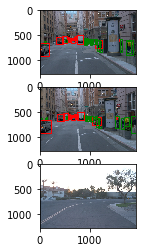

In [3]:
image_dir = "data/images/"
color_map = {
    1 : "r",
    2 : "g"
}

def get_rectangle(box, box_class):
#     print(box, box_class)
    start = (box[1], box[0])
    dx = box[3] - box[1]
    dy = box[2] - box[0]
    return Rectangle(start, dx, dy, fill=False, edgecolor=color_map[box_class])

def process_data(data, ax):  
    image_name = image_dir + data["filename"]
    image = plt.imread(image_name)
    ax.imshow(image)
    for box, box_class in zip(data["boxes"], data["classes"]):
        rect = get_rectangle(box, box_class)
        ax.add_patch(rect)

<ipython-input-10-de1b23dc96f9>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


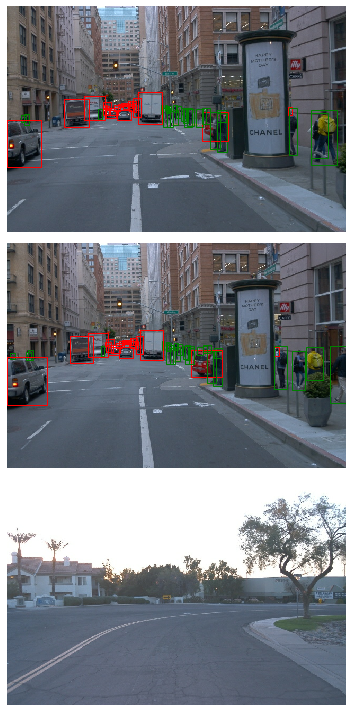

In [10]:
def viz(ground_truth):
    fig, axes = plt.subplots(len(ground_truth), figsize=[10 * len(ground_truth), 10])
    for data, ax in zip(ground_truth, axes):
        process_data(data, ax)
        ax.axis('off')
    plt.tight_layout()
    fig.show()

if __name__ == "__main__": 
    viz(ground_truth)